In [1]:
# 📘 Ridge vs Linear Regression on Synthetic Data

## 🔧 Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")


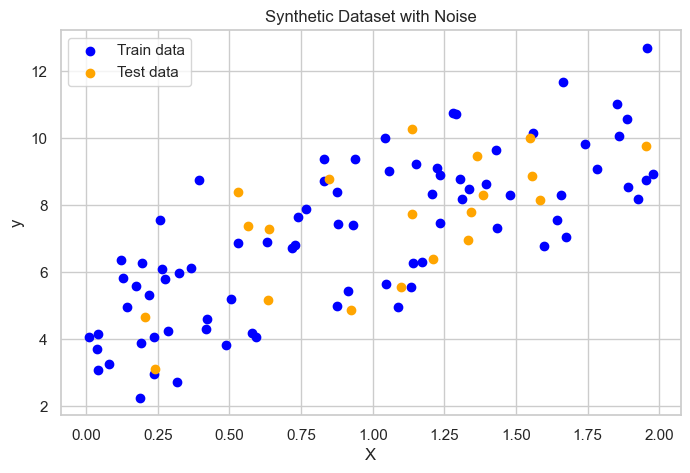

In [6]:
# Seed for reproducibility
np.random.seed(0)

# Generate linear data with noise
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100) * 1.5  # noisy linear data

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize data
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label="Train data", color='blue')
plt.scatter(X_test, y_test, label="Test data", color='orange')
plt.title("Synthetic Dataset with Noise")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [7]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train Ridge Regression with different λ values
ridge_01 = Ridge(alpha=0.1)
ridge_1 = Ridge(alpha=1)
ridge_10 = Ridge(alpha=10)

ridge_01.fit(X_train, y_train)
ridge_1.fit(X_train, y_train)
ridge_10.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_ridge_01 = ridge_01.predict(X_test)
y_pred_ridge_1 = ridge_1.predict(X_test)
y_pred_ridge_10 = ridge_10.predict(X_test)


In [8]:
# Print performance metrics
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

print("\nRidge Regression (λ=0.1):")
print("MSE:", mean_squared_error(y_test, y_pred_ridge_01))
print("R² Score:", r2_score(y_test, y_pred_ridge_01))

print("\nRidge Regression (λ=1):")
print("MSE:", mean_squared_error(y_test, y_pred_ridge_1))
print("R² Score:", r2_score(y_test, y_pred_ridge_1))

print("\nRidge Regression (λ=10):")
print("MSE:", mean_squared_error(y_test, y_pred_ridge_10))
print("R² Score:", r2_score(y_test, y_pred_ridge_10))


Linear Regression:
MSE: 2.064944805685715
R² Score: 0.43868851895306726

Ridge Regression (λ=0.1):
MSE: 2.0638187939910986
R² Score: 0.4389946013675904

Ridge Regression (λ=1):
MSE: 2.0561757143479227
R² Score: 0.44107221058138535

Ridge Regression (λ=10):
MSE: 2.1202419603046243
R² Score: 0.42365715943616533


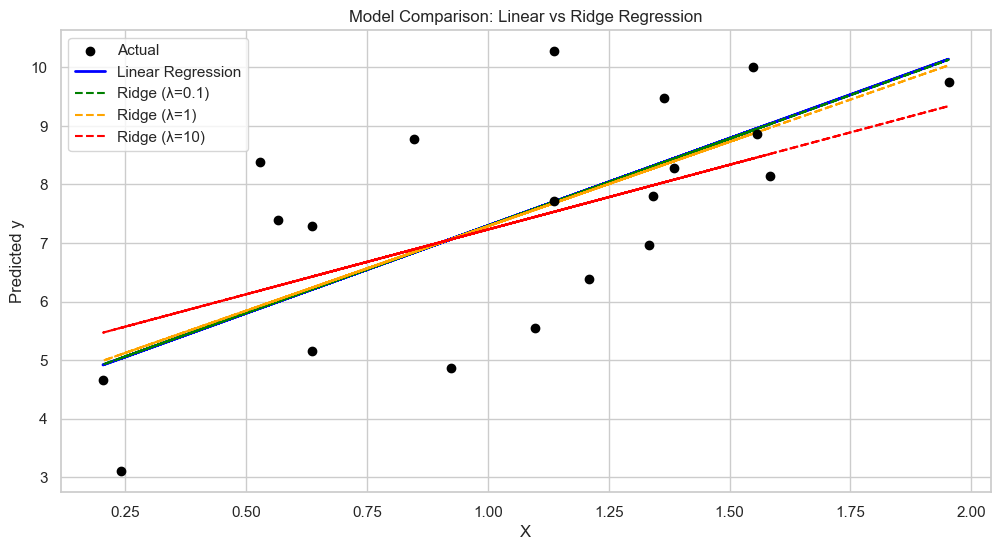

In [9]:
plt.figure(figsize=(12, 6))

# Actual vs Predicted data
plt.scatter(X_test, y_test, color='black', label="Actual", zorder=5)

# Plot Linear Regression predictions
plt.plot(X_test, y_pred_lr, label="Linear Regression", color='blue', linewidth=2, zorder=3)

# Plot Ridge predictions for different λ values
plt.plot(X_test, y_pred_ridge_01, label="Ridge (λ=0.1)", color='green', linestyle='--', zorder=4)
plt.plot(X_test, y_pred_ridge_1, label="Ridge (λ=1)", color='orange', linestyle='--', zorder=4)
plt.plot(X_test, y_pred_ridge_10, label="Ridge (λ=10)", color='red', linestyle='--', zorder=4)

plt.title("Model Comparison: Linear vs Ridge Regression")
plt.xlabel("X")
plt.ylabel("Predicted y")
plt.legend()
plt.show()
